In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv('/content/drive/MyDrive/netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [7]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [8]:
df.shape

(5837, 12)

##DATA Cleaning
1.we will perform data cleaning with three major operations

a) finding missing vale and filling them            

b) finding duplicates values and dropping them

c) Finding outliers and removing them

In [9]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [10]:
percentage_missing_value=df.isnull().sum()*100/len(df)
#print(percentage_missing_value)
missing_value_df=pd.DataFrame({'percentage_missing':percentage_missing_value})
missing_value_df

,percentage_missing
show_id,0.000000
title,0.000000
director,32.568100
cast,9.525441
country,7.315402
date_added,10.998801
release_year,0.000000
rating,0.171321
duration,0.000000
listed_in,0.000000


In [11]:
df['cast']=df['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df['number_of_cast']=df['cast'].apply(cast_counter)
df['cast']=df['cast'].replace('Unknown',np.nan)

In [12]:
df['cast']=df['cast'].fillna(df.cast.mode()[0])
df['director']=df['director'].fillna(df.director.mode()[0])
df['country']=df['country'].fillna(df.country.mode()[0])
df['date_added']=df['date_added'].fillna(df.date_added.mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [13]:
df.isnull().sum()

show_id           0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
type              0
number_of_cast    0
dtype: int64

In [14]:
duplicate=df.duplicated(['title','country','release_year','type'])
df[duplicate]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast
1134,80175351,Kakegurui,"Raúl Campos, Jan Suter","Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,"November 1, 2019",2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show,11
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie,6


In [15]:
df[(df.title=='Sarkar') | (df.title=='kakegurui')]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast
1740,81075235,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie,6
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie,6


In [16]:
df=df.drop_duplicates(['title','country','release_year','type'])
df.shape

(5835, 13)

In [17]:
df.drop('show_id',axis=1)

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast
0,Chocolate,"Raúl Campos, Jan Suter","Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,United States,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,Chip and Potato,"Raúl Campos, Jan Suter","Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 1, 2019",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5833,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5834,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5835,Dinner for Five,"Raúl Campos, Jan Suter",David Attenborough,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


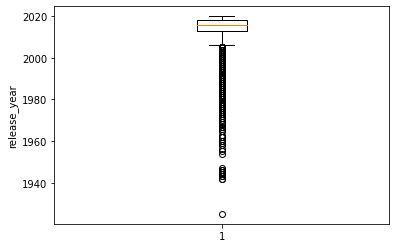

In [19]:
#finding outliers in Numeric data
plt.boxplot(df['release_year'],data=df)
plt.ylabel('release_year')
plt.show()

As we only few old movies year data so we will not drop as we want to analyze these movies data also

In [20]:
q1,q3=np.percentile(df['number_of_cast'],[25,75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
higher_bound=q3+1.5*iqr
print(lower_bound,higher_bound)
print(q1)
print(q3)
#print(df.number_of_cast.min())
#print(df.number_of_cast.sort_values())
print(df.number_of_cast.max())

-7.5 20.5
3.0
10.0
50


In [21]:
df=df[(df['number_of_cast']>-7.5 ) & (df['number_of_cast']<20.5)]
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast
0,81193313,Chocolate,"Raúl Campos, Jan Suter","Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,United States,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,80213643,Chip and Potato,"Raúl Campos, Jan Suter","Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 1, 2019",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5835,70157452,Dinner for Five,"Raúl Campos, Jan Suter",David Attenborough,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


In [22]:
df.shape

(5771, 13)

So our actual dataframe after data cleaning have 5771 rows and 13 columns

EDA

Movies and Tvshow distributions

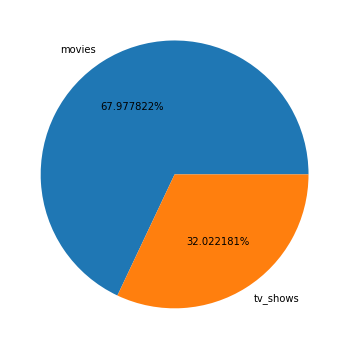

In [23]:
plt.figure(figsize=(6,8))
plt.pie(x=df.type.value_counts(),autopct='%2f%%',labels=['movies','tv_shows'])
plt.show()


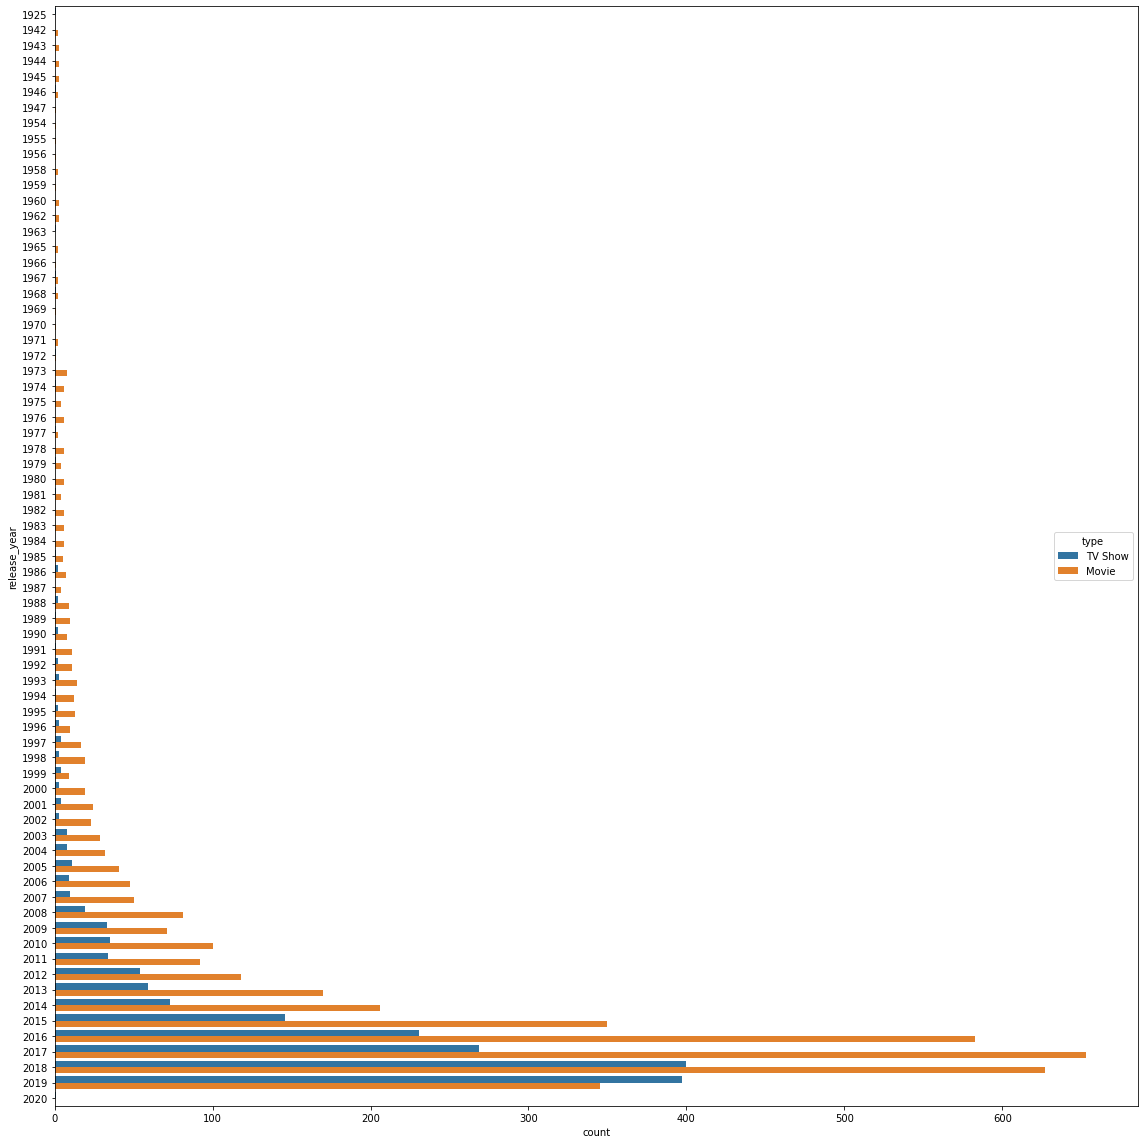

In [24]:
plt.figure(figsize=(16,16))
sns.countplot(y=df.release_year.sort_values( ascending=True),hue='type',data=df)
plt.tight_layout()
plt.show()

In 2018 Netflix release most number of content in the form of movies and Tv show

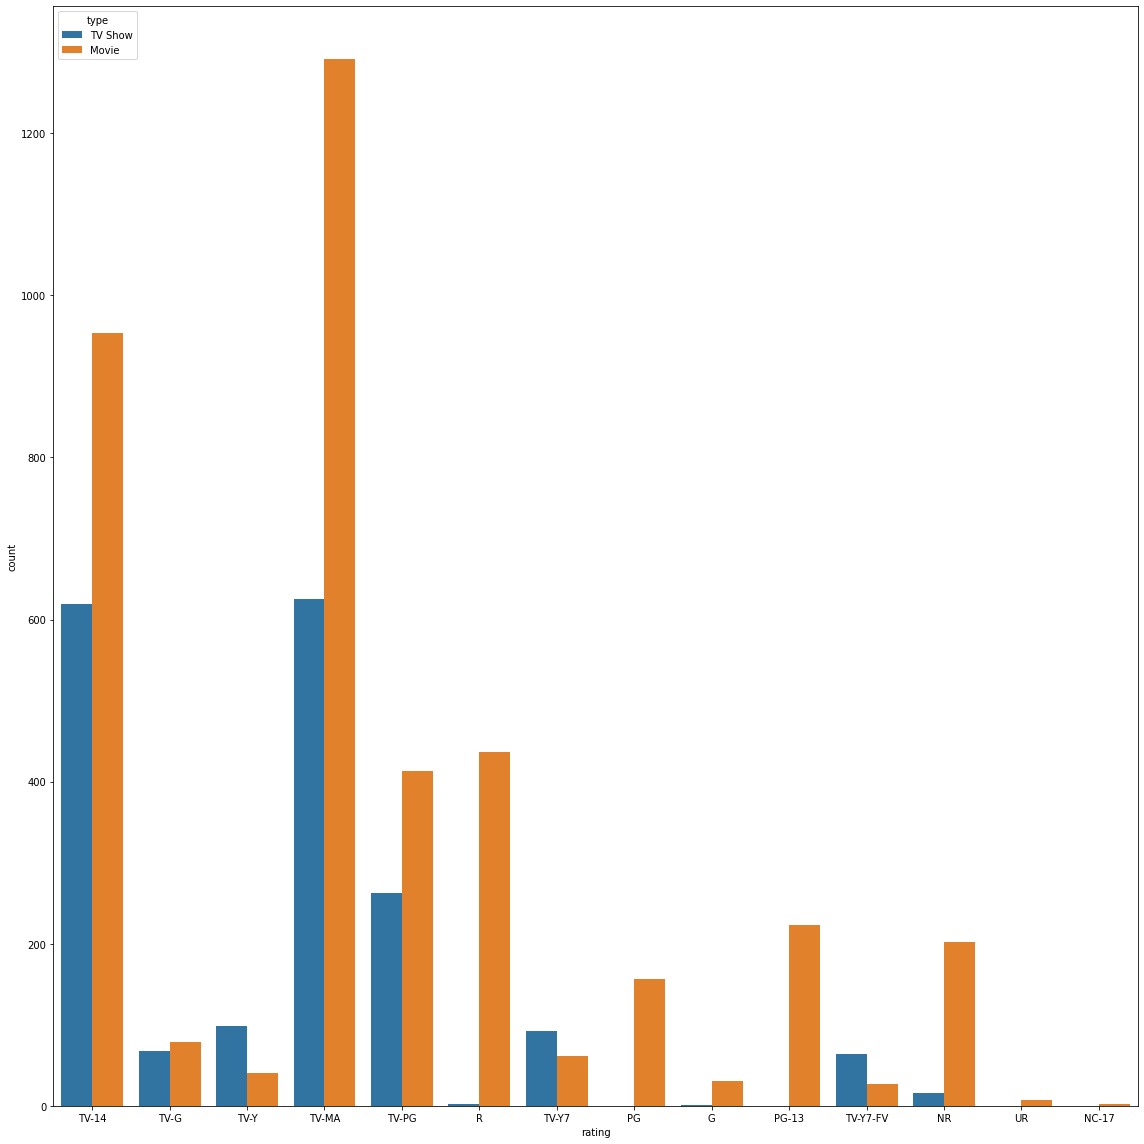

In [25]:
plt.figure(figsize=(16,16))
sns.countplot(x=df.rating,hue='type',data=df)
plt.tight_layout()
plt.show()


In [26]:
df.country.nunique()

525

As we have approx 525 unique country where Netflix released its content so we will try to find most productive countries and will try to perform EDA operations on them

In [27]:
df.country.value_counts().head(10)

United States     2304
India              696
United Kingdom     333
Japan              154
Canada             139
South Korea        133
Spain              111
France              84
Mexico              79
Turkey              78
Name: country, dtype: int64

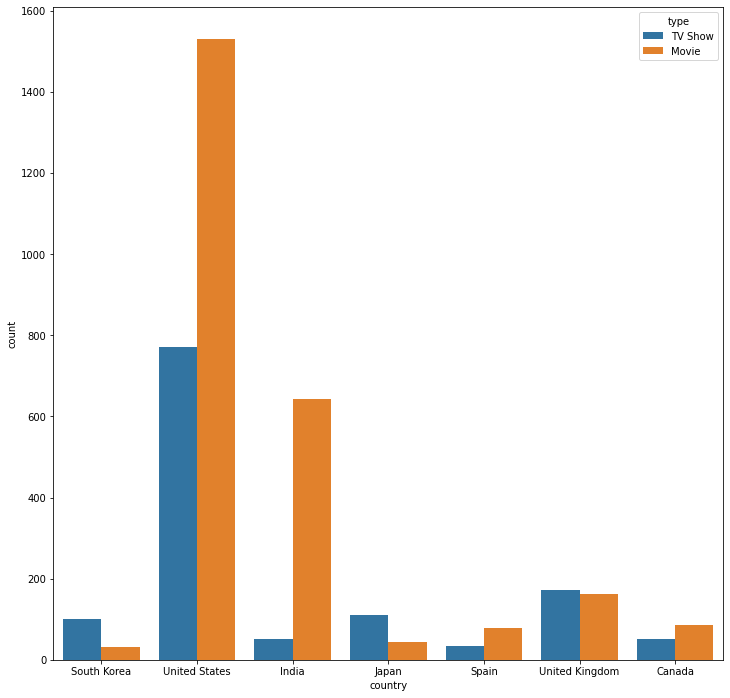

In [28]:
most_used_country=df[(df['country']=='United States')|(df['country']=='India')|
                    (df['country']=='United Kingdom')|
                    (df['country']=='Japan')|
                    (df['country']=='Canada')|
                    (df['country']=='South Korea')|
                    (df['country']=='Spain')]
plt.figure(figsize=(12,12))
sns.countplot(x='country',hue='type',data=most_used_country)
plt.show()

In [29]:
for i in most_used_country['country'].unique():
    print(i)
    print(most_used_country[most_used_country['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

South Korea
TV-14       51.127820
TV-MA       34.586466
TV-PG        6.015038
TV-Y         3.759398
NR           2.255639
TV-Y7        1.503759
TV-Y7-FV     0.751880
Name: rating, dtype: float64
----------
United States
TV-MA       30.859375
TV-14       20.008681
TV-PG       11.631944
R           10.069444
PG-13        5.772569
PG           3.949653
NR           3.949653
TV-Y7        3.732639
TV-Y         3.298611
TV-G         3.255208
TV-Y7-FV     2.256944
G            1.085069
UR           0.086806
NC-17        0.043403
Name: rating, dtype: float64
----------
India
TV-14       53.160920
TV-MA       23.419540
TV-PG       17.097701
NR           2.729885
TV-G         1.005747
TV-Y7        0.718391
PG-13        0.574713
PG           0.431034
TV-Y7-FV     0.287356
R            0.287356
TV-Y         0.143678
UR           0.143678
Name: rating, dtype: float64
----------
Japan
TV-14       43.506494
TV-MA       25.974026
TV-PG       11.038961
NR           7.792208
TV-Y7        5.844156
PG-13 

In [30]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year

In [31]:
df.date_added.value_counts()

2019-11-01    710
2018-03-01     78
2018-10-01     72
2019-10-01     71
2018-11-01     59
             ... 
2017-07-04      1
2019-04-09      1
2017-07-10      1
2017-07-12      1
2008-01-01      1
Name: date_added, Length: 1086, dtype: int64

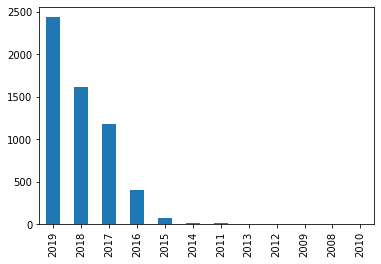

In [32]:
df['year_added'].value_counts().plot(kind='bar')

So in 2019 Netflix added most number of content . we donot have date of 2020 but we can predict that 2020 will be blasting year for netfix by seeing the date_added data of movies and tv show

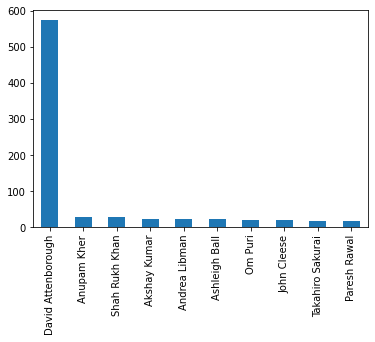

In [34]:
df['cast'].str.split(', ').explode('cast').value_counts().head(10).plot(kind='bar')

In [37]:
df1=df[df['cast'].str.find('Anupam Kher')>0]
df1.type.value_counts()

Movie      25
TV Show     1
Name: type, dtype: int64

Anupam kher have worked  in around 25 movies  and 1 Tv Show

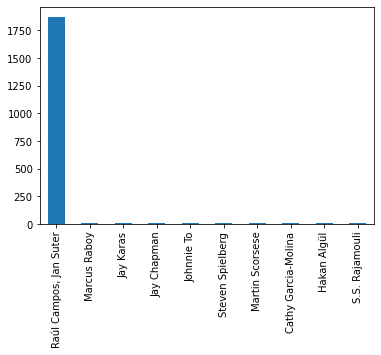

In [41]:
df.director.value_counts().head(10).plot(kind='bar')